In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [2]:
device = torch.device("mps")

In [3]:
torch.manual_seed(4242)

In [4]:
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data/p1ch2/mnist', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=64, shuffle=True)

In [5]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

In [6]:
model = Net()
model.to(device)

Net(
  (conv1): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2_drop): Dropout2d(p=0.5, inplace=False)
  (fc1): Linear(in_features=320, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=10, bias=True)
)

In [7]:
optimizer = optim.SGD(model.parameters(), lr=0.005, momentum=0.25)

epoch_loss_stats = []

In [23]:
from tqdm.notebook import tqdm

for epoch in tqdm(range(60), desc='Epochs'):
    batch_loss_stats = []
    for data, target in tqdm(train_loader, 
                            desc=f'Epoch {epoch+1}', 
                            leave=False):
        data, target  = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        batch_loss_stats.append(float(loss))
    epoch_loss_stats.append(sum(batch_loss_stats) / len(batch_loss_stats))

Epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 1:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch 2:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch 3:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch 4:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch 5:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch 6:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch 7:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch 8:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch 9:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch 10:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch 11:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch 12:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch 13:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch 14:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch 15:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch 16:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch 17:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch 18:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch 19:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch 20:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch 21:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch 22:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch 23:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch 24:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch 25:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch 26:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch 27:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch 28:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch 29:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch 30:   0%|          | 0/938 [00:00<?, ?it/s]

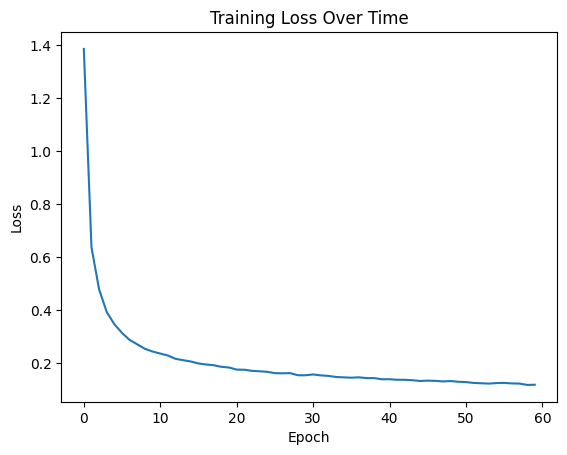

In [24]:
import matplotlib.pyplot as plt

plt.plot(epoch_loss_stats)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Time')
plt.show()


In [25]:
epoch_loss_stats[-1]

0.11785365749639012

In [28]:
torch.save(model.state_dict(), '../data/p1ch2/mnist/mnist.pth')

In [29]:
pretrained_model = Net()
pretrained_model.load_state_dict(torch.load('../data/p1ch2/mnist/mnist.pth', weights_only=True))

<All keys matched successfully>